In [ ]:
import numpy as np
import pandas as pd
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
cloud= pd.read_excel(r'C:\Users\id\Downloads\cloud gaming dataset.xlsx',usecols=[2,4,5,6,7,8])

In [ ]:
y = pd.DataFrame(cloud['QoE'])

In [ ]:
x=pd.DataFrame()
x['GameType'],x['Framerate'],x['Bitrate'],x['Fluidity'],x['Graphics']=cloud['GameType'],cloud['Framerate'],cloud['Bitrate'],cloud['Fluidity'],cloud['Graphics']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=0.001)

In [ ]:
R.fit(x_train, y_train)

Ridge(alpha=0.001)

In [ ]:
y_pred=R.predict(x_test)

In [ ]:
y_pred

array([[4.13623742],
       [2.73047178],
       [2.70634105],
       [3.65282088],
       [4.12758251],
       [4.03446128],
       [3.67775445],
       [3.25693434],
       [4.89443274],
       [5.01725486],
       [4.09103944],
       [4.56092385],
       [4.02308111],
       [3.16157254],
       [4.021544  ],
       [3.56459814],
       [4.90409855],
       [4.12657161],
       [3.15832106],
       [2.25488725],
       [4.55877189],
       [5.01400338],
       [3.58872888],
       [4.02092915],
       [4.02092915],
       [4.12758251],
       [3.12452452],
       [3.20787004],
       [2.28165462],
       [3.57984464],
       [3.55571391],
       [4.44776754],
       [2.6988272 ],
       [4.58931695],
       [2.75153903],
       [4.56580106],
       [2.70308957],
       [4.13795178],
       [5.0010861 ],
       [4.55552041],
       [3.19648987],
       [5.00587469],
       [3.17622546],
       [4.58931695],
       [4.94929653],
       [3.15832106],
       [3.27333243],
       [3.204

In [ ]:
y_pred=pd.DataFrame(y_pred)

In [ ]:
Ridge_reg=pd.DataFrame()
Ridge_reg=x_test

In [ ]:
Ridge_reg['Actual QoE']= y_test['QoE']

C:\Users\id\AppData\Local\Temp/ipykernel_19540/3447030591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ridge_reg['Actual QoE']= y_test['QoE']


In [ ]:
Ridge_reg.reset_index(inplace=True)

In [ ]:
Ridge_reg.drop("index", axis=1, inplace=True)

C:\Users\id\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
Ridge_reg['Predicte QoE']= y_pred[0]

C:\Users\id\AppData\Local\Temp/ipykernel_19540/473970529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ridge_reg['Predicte QoE']= y_pred[0]


In [ ]:
Ridge_reg['Error']= Ridge_reg['Actual QoE']- Ridge_reg['Predicte QoE']

C:\Users\id\AppData\Local\Temp/ipykernel_19540/1735178157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ridge_reg['Error']= Ridge_reg['Actual QoE']- Ridge_reg['Predicte QoE']


In [ ]:
Ridge_reg.head()

,GameType,Framerate,Bitrate,Fluidity,Graphics,Actual QoE,Predicte QoE,Error
0,2,60,10,4,4,4,4.136237,-0.136237
1,0,25,5,2,3,2,2.730472,-0.730472
2,0,25,3,3,2,4,2.706341,1.293659
3,1,25,3,3,4,3,3.652821,-0.652821
4,2,45,3,4,4,4,4.127583,-0.127583


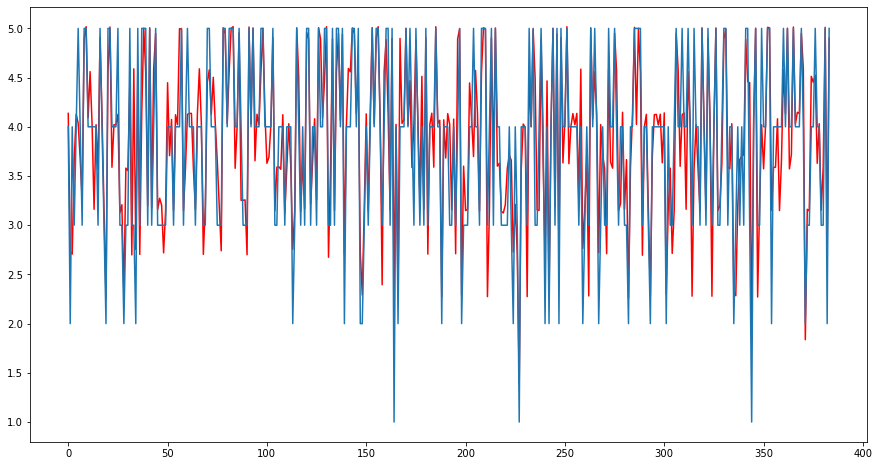

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(Ridge_reg['Predicte QoE'], 'r')
plt.plot(Ridge_reg['Actual QoE'])
plt.show()

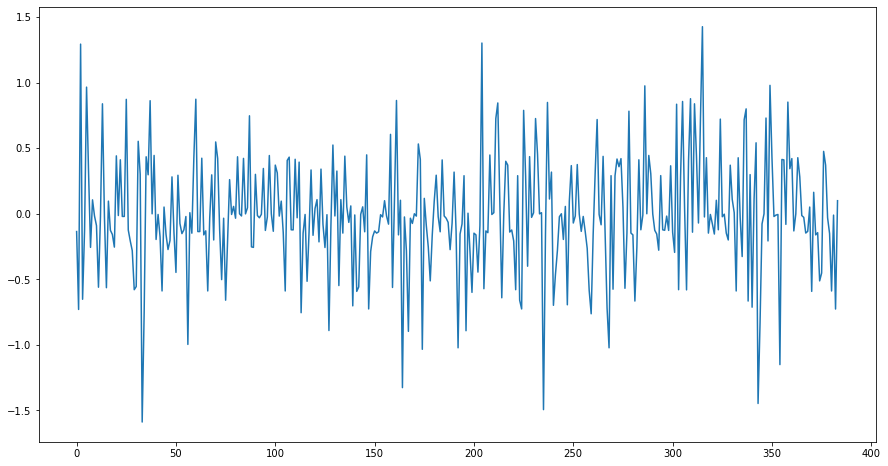

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(Ridge_reg['Error'])

In [ ]:
y_test.reset_index(inplace=True)

In [ ]:
y_test.drop("index", axis=1, inplace=True)

C:\Users\id\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
y_test

,QoE
0,4
1,2
2,4
3,3
4,4
...,...
379,3
380,3
381,5
382,2


In [ ]:
math.sqrt(mean_squared_error(y_test,y_pred))

0.44005857760080064

In [ ]:
r2_score(y_test,y_pred)

0.7589861223471653